In [ ]:
from importlib import reload

import jax_L96_partial_observations as jl
from jax_L96_partial_observations import jnp
import jax
jax.config.update("jax_enable_x64", True)
import numpy as np
from matplotlib import pyplot as plt

import plot

reload(jl)
reload(plot)

jndarray = jnp.ndarray
plot_error = plot.plot_error

In [ ]:
# Dimensions
I, J = 40, 5
J_sim = J

# System evolution parameters
γ1, γ2 = 1e-2, 0.5
c1, c2 = γ1, γ2
ds = jnp.array([0.2, 0.5, 1, 2, 5])
F = 8
μ = 5

system = jl.System(I, J, J_sim, γ1, γ2, c1, c2, ds, F, μ)
solver = jl.RK4(system)

In [ ]:
def simulate(t0, tf, dt):
    # Initial true state
    seed = 42
    key = jax.random.key(seed)
    init = jax.random.uniform(key, I + I * J)
    # To be able to compare with NumPy previous work:
    init = np.random.default_rng(42).uniform(size=I + I * J)

    u0 = jnp.array(init[:I])
    v0 = jnp.array(jnp.reshape(init[I:], (I, J)))

    # Initial simulation state
    u0_sim = jnp.zeros_like(u0)
    v0_sim = jnp.zeros_like(v0)

    U, V = solver.solve(
        system,
        u0,
        v0,
        t0,
        tf,
        dt,
    )

    # Nudged solution
    Un, Vn = solver.solve(
        system,
        u0_sim,
        v0_sim,
        t0,
        tf,
        dt,
        U,
    )

    return U, V, Un, Vn

KeyboardInterrupt: 

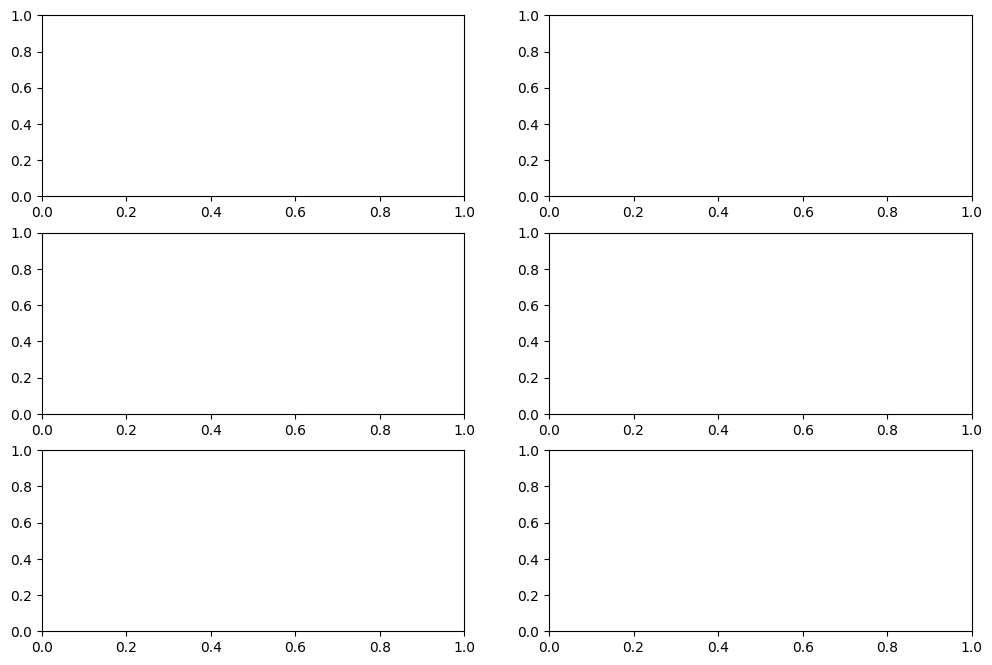

In [ ]:
t0, tf = 0, 200

fig, axs = plt.subplots(3, 2, figsize=(12, 8))

for dt in (0.025, 0.01, 0.001):#, 0.0001):
    U, V, Un, Vn = simulate(t0, tf, dt)

    plot_error(fig, axs, t0, tf, dt, U, V, Un, Vn)

fig.tight_layout()
plt.show()